# PDF Layout Parser - json conversion

Automate data extraction in pdf documents has many changeleges. Different layouts, scanned images, bad resolution, etc. 
Although it is possible create scripts for each type instance of pdf, create many scripts for specific cases can be problematic and hard to maintain. 
This project propuse a solution to convert any type of pdf in a stuctured data sucah as a json object each can easyly deal with.

In [1]:
import os
import time
import json
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from src.document_parser import DocumentParser

### Select PDF document

In [2]:
pdf_file = "pdf/toy_document.pdf"

In [3]:
doc_parser = DocumentParser(path_classifier_model = 'src/doc_classifier/model/model.csv')

### Parse text blocks

In [4]:
%%time
imgs = doc_parser.pre_processing_pdf(pdf_file)

CPU times: user 510 ms, sys: 297 ms, total: 807 ms
Wall time: 878 ms


In [5]:
%%time
block_text = []
for page in imgs:
    block_text.append(doc_parser.layout_parser.get_contour(page))

CPU times: user 444 ms, sys: 17.2 ms, total: 461 ms
Wall time: 237 ms


In [6]:
x = 1
for page in block_text:
    print('Page {} blocks:'.format(x))
    print(page)
    x += 1

Page 1 blocks:
[{'type': 'text', 'bb': [219, 168, 963, 257]}, {'type': 'text', 'bb': [243, 323, 821, 359]}, {'type': 'text', 'bb': [241, 404, 1231, 474]}, {'type': 'text', 'bb': [243, 525, 1310, 675]}, {'type': 'text', 'bb': [243, 727, 1308, 804]}]
Page 2 blocks:
[{'type': 'text', 'bb': [222, 168, 953, 257]}, {'type': 'text', 'bb': [243, 323, 1308, 521]}]


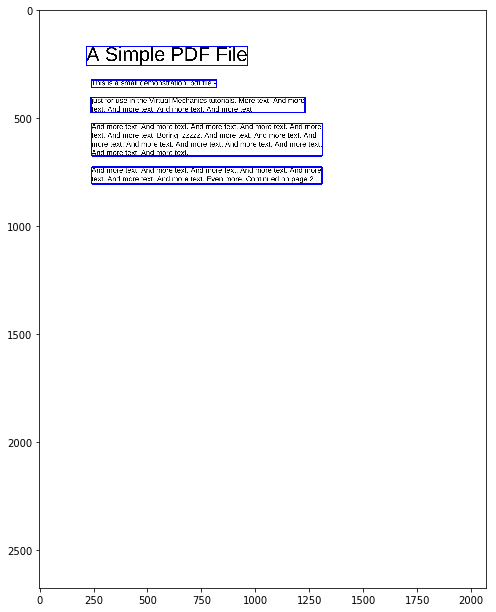

In [7]:
page = 1
temp_file = imgs[page -1].copy()
for block in block_text[page-1]:
    temp_file = cv2.rectangle(temp_file, (block['bb'][0],block['bb'][1]), (block['bb'][2],block['bb'][3]), (0,0,255), 5)

plt.figure(figsize=(8,15))
plt.imshow(temp_file)
plt.show()

### Generate json objects

In [8]:
%%time
json_pdf_result = []
for x in range(0, len(block_text)):
    json_pdf_result.append(doc_parser.ocr.read_block_texts(block_text[x], imgs[x]))

CPU times: user 201 ms, sys: 120 ms, total: 321 ms
Wall time: 1.67 s


In [9]:
json_pdf_result[0]

[{'type': 'text',
  'x': 219,
  'y': 168,
  'width': 744,
  'height': 89,
  'text': 'A Simple PDF File',
  'id': 1},
 {'type': 'text',
  'x': 243,
  'y': 323,
  'width': 578,
  'height': 36,
  'text': 'This is a small demonstration .pdf file -',
  'id': 2},
 {'type': 'text',
  'x': 241,
  'y': 404,
  'width': 990,
  'height': 70,
  'text': 'just for use in the Virtual Mechanics tutorials. More text. And more \ntext. And more text. And more text. And more text.',
  'id': 3},
 {'type': 'text',
  'x': 243,
  'y': 525,
  'width': 1067,
  'height': 150,
  'text': 'And more text. And more text. And more text. And more text. And more \ntext. And more text. Boring, zzzzz. And more text. And more text. And \nmore text. And more text. And more text. And more text. And more text. \nAnd more text. And more text.',
  'id': 4},
 {'type': 'text',
  'x': 243,
  'y': 727,
  'width': 1065,
  'height': 77,
  'text': 'And more text. And more text. And more text. And more text. And more \ntext. And more te

In [10]:
json_pdf_result[1]

[{'type': 'text',
  'x': 222,
  'y': 168,
  'width': 731,
  'height': 89,
  'text': 'Simple PDF File 2',
  'id': 1},
 {'type': 'text',
  'x': 243,
  'y': 323,
  'width': 1065,
  'height': 198,
  'text': 'continued from page 1. Yet more text. And more text. And more text. \nAnd more text. And more text. And more text. And more text. And more \ntext. Oh, how boring typing this stuff. But not as boring as watching \npaint dry. And more text. And more text. And more text. And more text. \nBoring. More, a little more text. The end, and just as well.',
  'id': 2}]

### Direct call no steps

In [11]:
import pprint
pp = pprint.PrettyPrinter(depth=3)

In [12]:
%%time
pdf_parsed_json = doc_parser.generate_json(pdf_file)

CPU times: user 3.27 s, sys: 704 ms, total: 3.98 s
Wall time: 7.73 s


In [13]:
pp.pprint(pdf_parsed_json)

{1: [{'height': 89,
      'id': 1,
      'text': 'A Simple PDF File',
      'type': 'text',
      'width': 744,
      'x': 219,
      'y': 168},
     {'height': 36,
      'id': 2,
      'text': 'This is a small demonstration .pdf file -',
      'type': 'text',
      'width': 578,
      'x': 243,
      'y': 323},
     {'height': 70,
      'id': 3,
      'text': 'just for use in the Virtual Mechanics tutorials. More text. And '
              'more \n'
              'text. And more text. And more text. And more text.',
      'type': 'text',
      'width': 990,
      'x': 241,
      'y': 404},
     {'height': 150,
      'id': 4,
      'text': 'And more text. And more text. And more text. And more text. And '
              'more \n'
              'text. And more text. Boring, zzzzz. And more text. And more '
              'text. And \n'
              'more text. And more text. And more text. And more text. And '
              'more text. \n'
              'And more text. And more text.',
  